In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cmocean as cmo
from IPython import display
import ipywidgets

**Contents**  
- [Simple 1D plotting](#Simple-1D-Plotting)
- [Histograms](#Histograms)
- [Pcolormesh](#Pcolormesh)
- [Animations](#Animations)
  - [Using IPython.display](#Using-IPython.display)
  - [Using ipywidgets](#Using-ipywidgets)
  - [Using FuncAnimation](#Using-FuncAnimation)

# Simple 1D Plotting

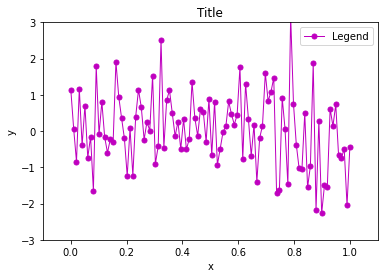

In [3]:
xs = np.linspace(0,1,100)
ys = np.random.randn(100)

fig, ax = plt.subplots()
line = ax.plot(xs, ys, 
        color='m',
        linestyle='-',
        linewidth=1,
        marker='o',
        markersize=5,
        label='Legend');
legend = ax.legend();

ax.set(title='Title',
       xlabel='x', 
       ylabel='y',
       xlim=(-0.1,1.1), 
       ylim=(-3,3)
      );

Plot elements

# Pcolormesh

In [14]:
# Create meshgrid and data
xs = np.linspace(-1,1,1000)
ys = np.linspace(-1,1,1000)
X, Y = np.meshgrid(xs,ys)
Z = X**2 + Y**2 + np.random.randn(1000**2).reshape(1000,1000)

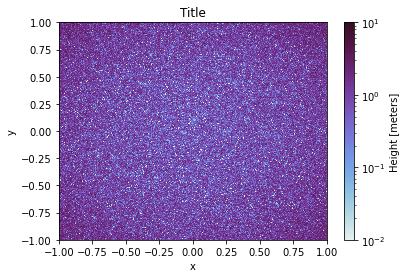

In [20]:
# Create plot elements
fig, ax = plt.subplots()
cmap = cmo.cm.dense
img = ax.pcolormesh(X, Y, Z, 
                    cmap=cmap, 
                    norm=matplotlib.colors.LogNorm(), 
                    vmin=1e-2, vmax=10)
cb = fig.colorbar(img)

# Set properties
ax.set(xlabel='x', ylabel='y', title='Title')
cb.set_label('Height [meters]')

# Vector fields

In [35]:
xs = np.linspace(-3,3, 10)
ys = np.linspace(-3,3, 10)
X,Y = np.meshgrid(xs, ys)
U = Y/np.sqrt(X**2 + Y**2)
V = -X/np.sqrt(X**2 + Y**2)

[Text(0, 0.5, 'y'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'Point vortex vector field')]

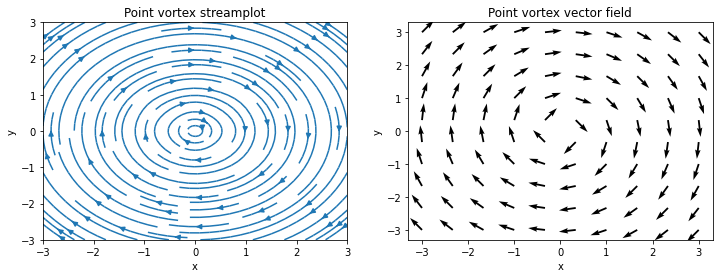

In [37]:
fig, axes = plt.subplots(figsize=(12,4), ncols=2)
axes[0].streamplot(xs, ys, U, V)
axes[0].set(title='Point vortex streamplot',
      xlabel='x', ylabel='y')
axes[1].quiver(xs, ys, U, V)
axes[1].set(title='Point vortex vector field',
      xlabel='x', ylabel='y')

# Animations

In [8]:
xs = np.linspace(-1,1)
ys = np.linspace(-1,1)
ts = np.arange(0.1,1.1,0.1)
X,Y,T = np.meshgrid(xs, ys, ts)
Z = 1/np.sqrt(T) * np.exp(-(X**2 + Y**2)/T)

ValueError: operands could not be broadcast together with shapes (50,50,10) (50,50) 

## Using IPython.display

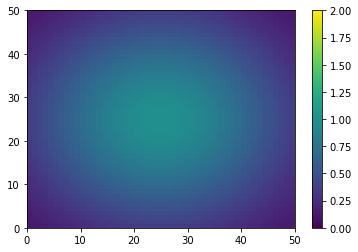

In [148]:
def plot_thing(record):
    plt.pcolormesh(Z[:,:,record], vmin=0, vmax=2)
    cb = plt.colorbar()
    
for record in range(10):
    display.display(plt.gcf())
    plt.clf()
    plot_thing(record)
    display.clear_output(wait=True)

## Using ipywidgets
This allows an interactive slider to 

In [149]:
def plot_thing(record):
    plt.pcolormesh(Z[:,:,record], vmin=0, vmax=1)
    cb = plt.colorbar()

num_records = 10
ipywidgets.interact(plot_thing, record=(0, num_records-1, 1))

interactive(children=(IntSlider(value=4, description='record', max=9), Output()), _dom_classes=('widget-intera…

<function __main__.plot_thing(record)>

## Using FuncAnimation
This is the best method for saving plots, but will not render in Jupyter products. Also, it can be a bit finnicky with the moviewriter.

In [160]:
!which ffmpeg

/Users/andrewbrettin/opt/anaconda3/bin/ffmpeg


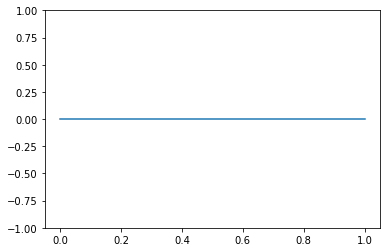

In [159]:
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.ffmpeg_path'] = '/Users/andrewbrettin/opt/anaconda3/envs/pangeo/bin/ffmpeg'
# plt.rcParams['animation.ffmpeg_path'] = '/Users/andrewbrettin/opt/anaconda3/bin/ffmpeg'
fig, ax = plt.subplots()

x = np.linspace(0,1)
y = 0*np.sin(x)

line = ax.plot(x, y)[0]
ax.set_ylim(-1,1)

def animate(i):
    line.set_ydata(np.sin(i*x))

anim = FuncAnimation(fig, animate, interval=100)
plt.draw()
plt.show()
anim.save('movie.gif', writer='imagemagick')